# Análise de Dados Experimentais - Vol 1

## Fundamentos de Estatística e Estimação de Parâmetros

### Márcio Schwaab e José Carlos Pinto

### Cap 4: Estimação de Parâmetros

#### Exemplos e exercícios

[afrjr.weebly.com](afrjr.weebly.com)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

colorcycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

### Exemplo 4.29

In [9]:
x_e = np.arange(6)
y_e = np.array([.1, .9, 2.2, 3.1, 3.9, 4.8])

n = 6

sum_x_e = np.sum(x_e)
sum_y_e = np.sum(y_e)

sum_x_e_2 = np.sum(x_e**2)
sum_x_e_y_e = np.sum(x_e*y_e)

alpha = (n*sum_x_e_y_e-sum_y_e*sum_x_e)/(n*sum_x_e_2-sum_y_e*sum_x_e)
beta = (sum_x_e-alpha*sum_y_e)/n

print(alpha)
print(beta)

0.9542857142857147
0.11428571428571328


In [10]:
y_m = alpha*x_e+beta
y_m

array([0.11428571, 1.06857143, 2.02285714, 2.97714286, 3.93142857,
       4.88571429])

In [11]:
sigma_y_hat_2 = np.sum((y_e-y_m)**2)/(n-2)
sigma_y_hat_2

0.020857142857142883

In [12]:
sigma_y_hat = np.sqrt(sigma_y_hat_2)
sigma_y_hat

0.14442002235542994

In [13]:
rho_m = np.corrcoef(y_e, y_m)[0,1]
rho_m

0.9973927130301823

In [14]:
sigma_alpha_2 = sigma_y_hat_2*n/(n*sum_x_e_2-sum_x_e*sum_y_e)
sigma_alpha = np.sqrt(sigma_alpha_2)
sigma_alpha

0.034522988495984515

In [15]:
sigma_beta_2 = sigma_y_hat_2*sum_x_e_2/(n*sum_x_e_2-sum_x_e*sum_y_e)
sigma_beta = np.sqrt(sigma_beta_2)
sigma_beta

0.10452353834437114

In [16]:
alpha_inf = scipy.stats.norm.ppf(0.025, loc = alpha, scale = sigma_alpha)
alpha_sup = scipy.stats.norm.ppf(0.975, loc = alpha, scale = sigma_alpha)

print(alpha_inf,'< alpha <', alpha_sup)

0.8866219001948945 < alpha < 1.021949528376535


In [17]:
beta_inf = scipy.stats.norm.ppf(0.025, loc = beta, scale = sigma_beta)
beta_sup = scipy.stats.norm.ppf(0.975, loc = beta, scale = sigma_beta)

print(beta_inf,'< beta <', beta_sup)

-0.09057665640594555 < beta < 0.31914808497737207


In [18]:
sigma_a_b_2 = sigma_y_hat_2*(-sum_x_e)/(n*sum_x_e_2-sum_x_e*sum_y_e)
sigma_a_b_2

-0.0029795918367346973

In [19]:
corr_a_b = sigma_a_b_2/(sigma_alpha*sigma_beta)
corr_a_b

-0.8257228238447704

In [20]:
F_sup = scipy.stats.f.ppf(0.975,4,4)
print(F_sup)

9.60452988472286


In [21]:
a = sigma_alpha_2/sigma_y_hat_2
b = 2* sigma_a_b_2/sigma_y_hat_2
c = (sigma_beta_2 + sigma_y_hat_2)/sigma_y_hat_2-F_sup

print(a,b,c)

0.05714285714285714 -0.2857142857142857 -8.080720360913336


In [22]:
np.roots([a,b,c])

array([14.65165035, -9.65165035])

In [23]:
sigma_a_b_2

-0.0029795918367346973

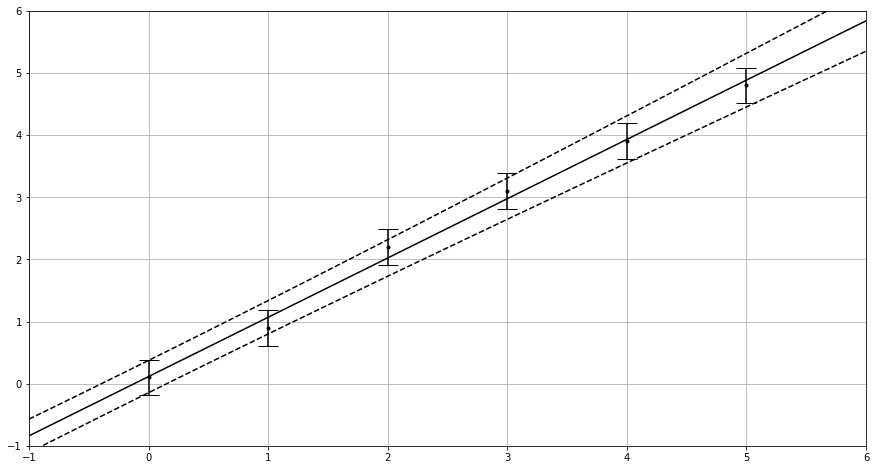

In [24]:
fig, ax = plt.subplots(figsize = (15,8))

x = np.linspace(-1,6,100)
y = alpha*x+beta
ax.plot(x,y, color='k')

ax.errorbar(x_e, y_e, yerr = 2*sigma_y_hat, capsize = 10, ls='', marker = '.', color='k')
#plt.plot(x_e, y_m, '-')
ax.axis([-1,6,-1,6])
ax.grid('on')

sigma_y_hat_posteriori = lambda x: np.sqrt(sigma_alpha_2*x**2 - 2*sigma_a_b_2+ sigma_beta_2)

ax.plot(x,y+2*sigma_y_hat_posteriori(x),'--', color='k')
ax.plot(x,y-2*sigma_y_hat_posteriori(x),'--', color='k');